# An image processing example 

> One step at a time 

In the previous section we found 28 tif files that we need to inspect and subsequently process. In this example for every imaged page of the falnama manuscript we need to stitch the upper and lower halves of the pages.   

In [ ]:
from fairdatanow import RemoteData
import os 

In [ ]:
configuration = {
    'url': "https://laboppad.nl/falnama-project", 
    'user':    os.getenv('NC_AUTH_USER'),
    'password': os.getenv('NC_AUTH_PASS')
}

In [ ]:
remote_data = RemoteData(configuration)
remote_data.listdir(search_regex='edited.tif')

Please wait while scanning all file paths in remote folder...
Ready building file table for 'falnama-project'
Total number of files and directories: 6347
Total size of the files: 194.8 GiB


ITable(classes='display nowrap')

Let's take a look at the filenames. 

In [ ]:
files = remote_data.download_selected()

basenames = [os.path.basename(f) for f in files]
basenames

Ready with downloading 28 selected remote files to local cache: /home/frank/.cache/fairdatanow                                                                      


['71803-10_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-10_top_Falnama_grenz_1-2_edited.tif',
 '71803-11_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-11_top_Falnama_grenz_1-2_edited.tif',
 '71803-17_bottom_Falnama_genz_2-2_edited.tif',
 '71803-17_top_Falnama_grenz_1-2_edited.tif',
 '71803-19_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-19_top_Falnama_grenz_1-2_edited.tif',
 '71803-1_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-1_top_Falnama_grenz_1-2_edited.tif',
 '71803-20_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-20_top_Falnama_grenz_1-2_edited.tif',
 '71803-21_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-21_top_Falnama_grenz_1-2_edited.tif',
 '71803-22_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-22_top_Falnama_grenz_1-2_edited.tif',
 '71803-2_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-2_top_Falnama_grenz_1-2_edited.tif',
 '71803-3_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-3_top_Falnama_grenz_1-2_edited.tif',
 '71803-4_bottom_Falnama_grenz_2-2_edited.tif',
 '71803-4

Ok, we need to fix a few problems here before we can stitch. First, we need an efficient thumbnail generation for plotting an overview. Second, we need to rename these files so we get a proper order.  

In [ ]:
import matplotlib.pyplot as plt
import re 
import skimage as sk

In [ ]:
thumbnail = sk.transform.rescale(im, 0.1)
thumbnail.shape

(1096, 1195, 1)

In [ ]:
i = 0 
im = plt.imread(files[i])

im.shape

(10961, 11954, 3)

<matplotlib.image.AxesImage>

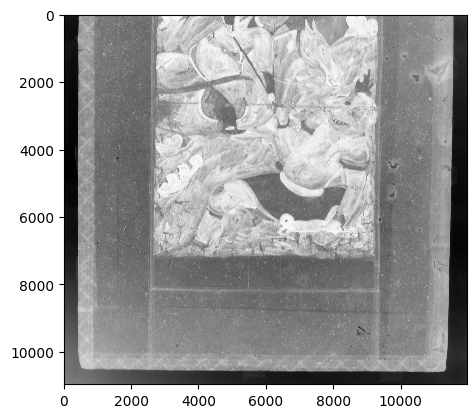

In [ ]:
fig, ax = plt.subplots()
ax.imshow(im)

In [ ]:
for b in basenames: 
    num, halve = re.match(r'71803-(\d+).([^_]+)', b).groups()
    num = int(num)

    print(f'{num:02}_{halve}')
    

10_bottom
10_top
11_bottom
11_top
17_bottom
17_top
19_bottom
19_top
01_bottom
01_top
20_bottom
20_top
21_bottom
21_top
22_bottom
22_top
02_bottom
02_top
03_bottom
03_top
04_bottom
04_top
06_bottom
06_top
07_bottom
07_top
08_top
08_bottom


In [ ]:

page_nums = [re.sub()] 